In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("loan_prediction.csv")
loan=data.copy()
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [942]:
loan.shape

(614, 13)

In [943]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
cat_df=loan.select_dtypes(exclude="number")
for i in cat_df.columns:
    loan[i].fillna(loan[i].mode,inplace=True)

In [17]:
cat_df.isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [945]:
for i in loan.columns:
    if loan[i].isnull().sum()>0:
        loan[i+"_na"]=loan[i].isnull()
    else:
        continue

In [946]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_na,Married_na,Dependents_na,Self_Employed_na,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,False,False,False,False,True,False,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,False,False,False,False,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,False,False,False,False,False,False,False


In [947]:
loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [948]:
from sklearn.preprocessing import LabelEncoder
loan["Dependents"] = LabelEncoder().fit_transform(loan["Dependents"])

In [949]:
loan["Dependents"].value_counts()

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64

In [950]:
loan.Gender.fillna("Unknown", inplace=True)
loan.Married.fillna("Unknown", inplace=True)
loan.Self_Employed.fillna("Unknown", inplace=True)
loan.LoanAmount.fillna(loan.LoanAmount.mean(),inplace=True)
loan.Loan_Amount_Term.fillna(loan["Loan_Amount_Term"].mean(),inplace=True)
loan.Credit_History.fillna(loan["Credit_History"].mean(),inplace=True)


In [951]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Gender_na              0
Married_na             0
Dependents_na          0
Self_Employed_na       0
LoanAmount_na          0
Loan_Amount_Term_na    0
Credit_History_na      0
dtype: int64

In [952]:
loan.shape

(614, 20)

In [953]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_na', 'Married_na', 'Dependents_na', 'Self_Employed_na',
       'LoanAmount_na', 'Loan_Amount_Term_na', 'Credit_History_na'],
      dtype='object')

In [954]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    int32  
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
 13  Gender_na            614 non-null    bool   
 14  Married_na           614 non-null    bool   
 15  Dependents_na        614 non-null    boo

<AxesSubplot:>

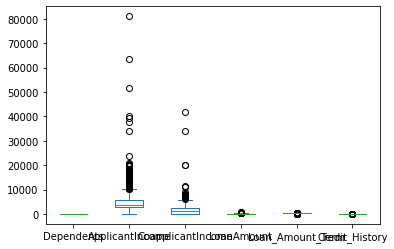

In [955]:
loan.plot(kind="box")

In [956]:
df=loan[["Dependents","ApplicantIncome","CoapplicantIncome","LoanAmount", "Loan_Amount_Term", "Credit_History"]]

In [957]:
df.shape

(614, 6)

In [958]:
from sklearn.preprocessing import StandardScaler
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns).abs()

In [959]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.752060,0.072991,0.554487,0.000000,0.279851,0.45164
1,0.141102,0.134412,0.038732,0.219273,0.279851,0.45164
2,0.752060,0.393747,0.554487,0.957641,0.279851,0.45164
3,0.752060,0.462062,0.251980,0.314547,0.279851,0.45164
4,0.752060,0.097728,0.554487,0.064454,0.279851,0.45164


<AxesSubplot:>

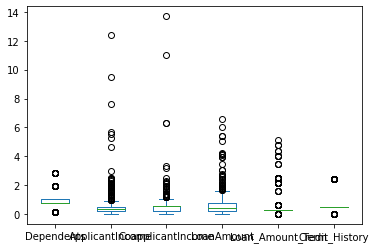

In [960]:
df.plot(kind="box")

In [961]:
loan2=loan.drop("Loan_ID",axis=1).copy()

In [962]:
loan2[df.columns]=df

In [963]:
loan2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_na,Married_na,Dependents_na,Self_Employed_na,LoanAmount_na,Loan_Amount_Term_na,Credit_History_na
0,Male,No,0.752060,Graduate,No,0.072991,0.554487,0.000000,0.279851,0.451640,Urban,Y,False,False,False,False,True,False,False
1,Male,Yes,0.141102,Graduate,No,0.134412,0.038732,0.219273,0.279851,0.451640,Rural,N,False,False,False,False,False,False,False
2,Male,Yes,0.752060,Graduate,Yes,0.393747,0.554487,0.957641,0.279851,0.451640,Urban,Y,False,False,False,False,False,False,False
3,Male,Yes,0.752060,Not Graduate,No,0.462062,0.251980,0.314547,0.279851,0.451640,Urban,Y,False,False,False,False,False,False,False
4,Male,No,0.752060,Graduate,No,0.097728,0.554487,0.064454,0.279851,0.451640,Urban,Y,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.752060,Graduate,No,0.410130,0.554487,0.898095,0.279851,0.451640,Rural,Y,False,False,False,False,False,False,False
610,Male,Yes,1.927426,Graduate,No,0.212557,0.554487,1.267279,2.518655,0.451640,Rural,Y,False,False,False,False,False,False,False
611,Male,Yes,0.141102,Graduate,No,0.437174,0.472404,1.269371,0.279851,0.451640,Urban,Y,False,False,False,False,False,False,False
612,Male,Yes,1.034264,Graduate,No,0.357064,0.554487,0.483367,0.279851,0.451640,Urban,Y,False,False,False,False,False,False,False


In [964]:
loan2.dropna(inplace=True)

In [965]:
loan2=pd.get_dummies(loan2)
loan2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_na,Married_na,Dependents_na,Self_Employed_na,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.752060,0.072991,0.554487,0.000000,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,0,0,1,0,1
1,0.141102,0.134412,0.038732,0.219273,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,1,0,0,1,0
2,0.752060,0.393747,0.554487,0.957641,0.279851,0.451640,False,False,False,False,...,1,0,0,0,1,0,0,1,0,1
3,0.752060,0.462062,0.251980,0.314547,0.279851,0.451640,False,False,False,False,...,0,1,1,0,0,0,0,1,0,1
4,0.752060,0.097728,0.554487,0.064454,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.752060,0.410130,0.554487,0.898095,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,1,0,0,0,1
610,1.927426,0.212557,0.554487,1.267279,2.518655,0.451640,False,False,False,False,...,1,0,1,0,0,1,0,0,0,1
611,0.141102,0.437174,0.472404,1.269371,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,0,0,1,0,1
612,1.034264,0.357064,0.554487,0.483367,0.279851,0.451640,False,False,False,False,...,1,0,1,0,0,0,0,1,0,1


In [966]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
regression=LogisticRegression()

In [967]:
y=loan2.Loan_Status_N
X=loan2.drop(["Loan_Status_N","Loan_Status_Y"],axis=1)

In [968]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

In [969]:
regression.fit(X_train, y_train)
y_pred=regression.predict(X_test)

In [970]:
regression.score(X_train,y_train)

0.8065173116089613

In [971]:
regression.score(X_test,y_test)

0.8373983739837398

In [972]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        90
           1       0.88      0.45      0.60        33

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Confusion matrix

 [[88  2]
 [18 15]]


In [1049]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
models = [('lr',LogisticRegression()),('svm',SVC(probability=True)),("dtc",DecisionTreeClassifier())]
ensemble_voting = VotingClassifier(estimators=models,voting='soft')

In [1050]:
ensemble_voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('dtc', DecisionTreeClassifier())],
                 voting='soft')

In [1051]:
y_pred=ensemble_voting.predict(X_test)

In [1052]:
ensemble_voting.score(X_train,y_train)

0.8961303462321792

In [1053]:
ensemble_voting.score(X_test,y_test)

0.8211382113821138

In [978]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        90
           1       0.76      0.58      0.66        33

    accuracy                           0.84       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.83      0.84      0.83       123

Confusion matrix

 [[84  6]
 [14 19]]


In [979]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train,y_train)

In [980]:
y_pred=clf.predict(X_test)

In [981]:
clf.score(X_train,y_train)

0.8126272912423625

In [982]:
clf.score(X_test,y_test)

0.8292682926829268

In [983]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        90
           1       0.88      0.42      0.57        33

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Confusion matrix

 [[88  2]
 [19 14]]


In [984]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [985]:
y_pred=gbc.predict(X_test)

In [986]:
gbc.score(X_train, y_train)

0.8553971486761711

In [987]:
gbc.score(X_test, y_test)

0.8211382113821138

In [988]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        90
           1       0.74      0.52      0.61        33

    accuracy                           0.82       123
   macro avg       0.79      0.72      0.75       123
weighted avg       0.81      0.82      0.81       123

Confusion matrix

 [[84  6]
 [16 17]]


In [989]:
import xgboost as xgb

In [1014]:
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.59650
[1]	validation_0-logloss:0.55558
[2]	validation_0-logloss:0.52471
[3]	validation_0-logloss:0.49941
[4]	validation_0-logloss:0.48714
[5]	validation_0-logloss:0.48088
[6]	validation_0-logloss:0.47257
[7]	validation_0-logloss:0.47297
[8]	validation_0-logloss:0.46166
[9]	validation_0-logloss:0.47248
[10]	validation_0-logloss:0.47949
[11]	validation_0-logloss:0.47732
[12]	validation_0-logloss:0.48407
[13]	validation_0-logloss:0.48081
[14]	validation_0-logloss:0.48010
[15]	validation_0-logloss:0.48265
[16]	validation_0-logloss:0.48511
[17]	validation_0-logloss:0.49004


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1015]:
y_pred=xgb_model.predict(X_test)

In [1016]:
xgb_model.score(X_train, y_train)

0.8839103869653768

In [1017]:
xgb_model.score(X_test, y_test)

0.8373983739837398

In [1018]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        90
           1       0.76      0.58      0.66        33

    accuracy                           0.84       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.83      0.84      0.83       123

Confusion matrix

 [[84  6]
 [14 19]]


In [1020]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [1021]:
y_pred=model.predict(X_test)

In [1022]:
model.score(X_train, y_train)

0.9979633401221996

In [1023]:
model.score(X_test, y_test)

0.8130081300813008

In [1024]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.68      0.58      0.62        33

    accuracy                           0.81       123
   macro avg       0.77      0.74      0.75       123
weighted avg       0.81      0.81      0.81       123

Confusion matrix

 [[81  9]
 [14 19]]


In [1026]:
from catboost import CatBoostClassifier

ctb = CatBoostClassifier(iterations=2, learning_rate=1, depth=2)

In [1039]:
ctb.fit(X_train, y_train)

0:	learn: 0.4823993	total: 656us	remaining: 656us
1:	learn: 0.4689726	total: 1.36ms	remaining: 0us


In [1040]:
y_pred=ctb.predict(X_test)

In [1041]:
ctb.score(X_train, y_train)

0.8065173116089613

In [1042]:
ctb.score(X_test, y_test)

0.8292682926829268

In [1043]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        90
           1       0.88      0.42      0.57        33

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

Confusion matrix

 [[88  2]
 [19 14]]
